<h2>Using pandas to Work With Text-Formatted Data</h2>

This notebook demonstrates how pandas (local version: 1.3.3) can be used to read in text-formatted data - nominally, data in spreadsheet, CSV, or similar formats - for subsequent manipulation, plotting, etc. in Python.

We begin by loading pandas, numpy (to aid in some later calculations), and matplotlib's pyplot routine (to generate plots). We also load in matplotlib's dates routine to aid in later date-related plotting operations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

Stored locally is a CSV file containing daily record and average high and low temperature data for Milwaukee, WI (KMKE), current as of early September 2023. pandas provides a read_csv function that can be used to read in these data:

In [2]:
data = pd.read_csv("MKERecords.csv")
print(data)

    day_of_year  record_high_F  record_low_F  average_high_F  average_low_F
0         1-Jan             56           -11              32             19
1         2-Jan             56           -19              32             19
2         3-Jan             59           -20              32             19
3         4-Jan             60           -23              32             19
4         5-Jan             56           -24              32             18
..          ...            ...           ...             ...            ...
360      27-Dec             55           -17              33             20
361      28-Dec             62           -20              33             20
362      29-Dec             62           -21              33             20
363      30-Dec             59           -11              33             20
364      31-Dec             59           -15              33             19

[365 rows x 5 columns]


This CSV file is reasonable well-structured; it contains a single header row at the beginning of the data that pandas is able to automatically recognize, and all of the data are delimited using commas. pandas provides keyword arguments to be able to specify which row to use to for the header (as well as an option to manually name each column yourself), specify a different delimiter, and much more - see https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html for full details.

However, the day_of_year column is not ideally structured. It doesn't have enough date/time-related information for pandas to consider it as a datetime object, but the numbers that it contains keep pandas from thinking its a string object, so it gets ascribed to the generic "object" object (as we could see if we ran <font face="Courier">print(data.dtypes)</font>). Instead, let's use the pandas <i>to_datetime</i> function to convert these over to formal datetime objects. We specify the input format as %d-%b, where %d is the day of the month and %b is the three-letter month abbreviation. After we do so, we print the data:

In [3]:
data['day_of_year'] = pd.to_datetime(data['day_of_year'], format='%d-%b')
print(data)

    day_of_year  record_high_F  record_low_F  average_high_F  average_low_F
0    1900-01-01             56           -11              32             19
1    1900-01-02             56           -19              32             19
2    1900-01-03             59           -20              32             19
3    1900-01-04             60           -23              32             19
4    1900-01-05             56           -24              32             18
..          ...            ...           ...             ...            ...
360  1900-12-27             55           -17              33             20
361  1900-12-28             62           -20              33             20
362  1900-12-29             62           -21              33             20
363  1900-12-30             59           -11              33             20
364  1900-12-31             59           -15              33             19

[365 rows x 5 columns]


When no year is specified, datetime infers a year of 1900. We don't care about the year in this instance, though, and we will excise that from later plots that we create.

We can subset the data by columns, e.g.,

In [4]:
print(data['record_high_F'])

0      56
1      56
2      59
3      60
4      56
       ..
360    55
361    62
362    62
363    59
364    59
Name: record_high_F, Length: 365, dtype: int64


Perhaps we want to add columns for the average and record high and low temperatures in °C. There are multiple ways in which we could do this. We could use MetPy to add units to the data and convert them on the fly to °C. Here, however, we avoid loading MetPy by doing it ourselves. Note how we ascribe the data to new columns without having to first create empty ones.

In [5]:
data['average_high_C'] = (data['average_high_F'] - 32)/1.8
data['average_low_C'] = (data['average_low_F'] - 32)/1.8
data['record_high_C'] = (data['record_high_F'] - 32)/1.8
data['record_low_C'] = (data['record_low_F'] - 32)/1.8
print(data[['average_high_C','average_low_C','record_high_C','record_low_C']])

     average_high_C  average_low_C  record_high_C  record_low_C
0          0.000000      -7.222222      13.333333    -23.888889
1          0.000000      -7.222222      13.333333    -28.333333
2          0.000000      -7.222222      15.000000    -28.888889
3          0.000000      -7.222222      15.555556    -30.555556
4          0.000000      -7.777778      13.333333    -31.111111
..              ...            ...            ...           ...
360        0.555556      -6.666667      12.777778    -27.222222
361        0.555556      -6.666667      16.666667    -28.888889
362        0.555556      -6.666667      16.666667    -29.444444
363        0.555556      -6.666667      15.000000    -23.888889
364        0.555556      -7.222222      15.000000    -26.111111

[365 rows x 4 columns]


Or, printing the full DataFrame shows us that we now have nine columns:

In [6]:
print(data)

    day_of_year  record_high_F  record_low_F  average_high_F  average_low_F  \
0    1900-01-01             56           -11              32             19   
1    1900-01-02             56           -19              32             19   
2    1900-01-03             59           -20              32             19   
3    1900-01-04             60           -23              32             19   
4    1900-01-05             56           -24              32             18   
..          ...            ...           ...             ...            ...   
360  1900-12-27             55           -17              33             20   
361  1900-12-28             62           -20              33             20   
362  1900-12-29             62           -21              33             20   
363  1900-12-30             59           -11              33             20   
364  1900-12-31             59           -15              33             19   

     average_high_C  average_low_C  record_high_C  

We might be interested in some attributes from these data. For instance, let's compute the mean, maximum, and minimum values for the record high and low temperatures (in °F):

In [7]:
high_max, high_min, high_mean = np.max(data['record_high_F']), np.min(data['record_high_F']), np.mean(data['record_high_F'])
print("highest: ", high_max, "°F, lowest: ", high_min, "°F, mean: ", high_mean, "°F ",)
low_max, low_min, low_mean = np.max(data['record_low_F']), np.min(data['record_low_F']), np.mean(data['record_low_F'])
print("highest: ", low_max, "°F, lowest: ", low_min, "°F, mean: ", low_mean, "°F ",)

highest:  105 °F, lowest:  49 °F, mean:  80.4876712328767 °F 
highest:  53 °F, lowest:  -26 °F, mean:  16.898630136986302 °F 


We can also do this using pandas' intrinsic functions. In this example, we retain all rows for the 1th through the last column (all columns except the day_of_year column). The max, min, and mean for these data (axis=0 specifies to compute the mean across the data's rows) are then computed and printed. Note that as compared to the previous example, we also compute the maximum, minimum, and mean values for the average high and low temperatures as well.

In [8]:
print("maximums\n", data.iloc[:,1:].max(axis=0))
print("\nminimums\n", data.iloc[:,1:].min(axis=0))
print("\nmeans\n", data.iloc[:,1:].mean(axis=0))

maximums
 record_high_F     105.000000
record_low_F       53.000000
average_high_F     82.000000
average_low_F      65.000000
average_high_C     27.777778
average_low_C      18.333333
record_high_C      40.555556
record_low_C       11.666667
dtype: float64

minimums
 record_high_F     49.000000
record_low_F     -26.000000
average_high_F    30.000000
average_low_F     16.000000
average_high_C    -1.111111
average_low_C     -8.888889
record_high_C      9.444444
record_low_C     -32.222222
dtype: float64

means
 record_high_F     80.487671
record_low_F      16.898630
average_high_F    57.520548
average_low_F     41.490411
average_high_C    14.178082
average_low_C      5.272451
record_high_C     26.937595
record_low_C      -8.389650
dtype: float64


pandas contains many, many more math functions, but unfortunately there is no single page that lists them all without also listing pandas' other operations.

<hr>

Having successfully read in and performed some calculations on our dataset, let's create a couple of basic plots. First, let's plot the record high temperature (in °F) as a function of the day of the year. We use the matplotlib date formatter to return our date format back to day-Month in so doing.

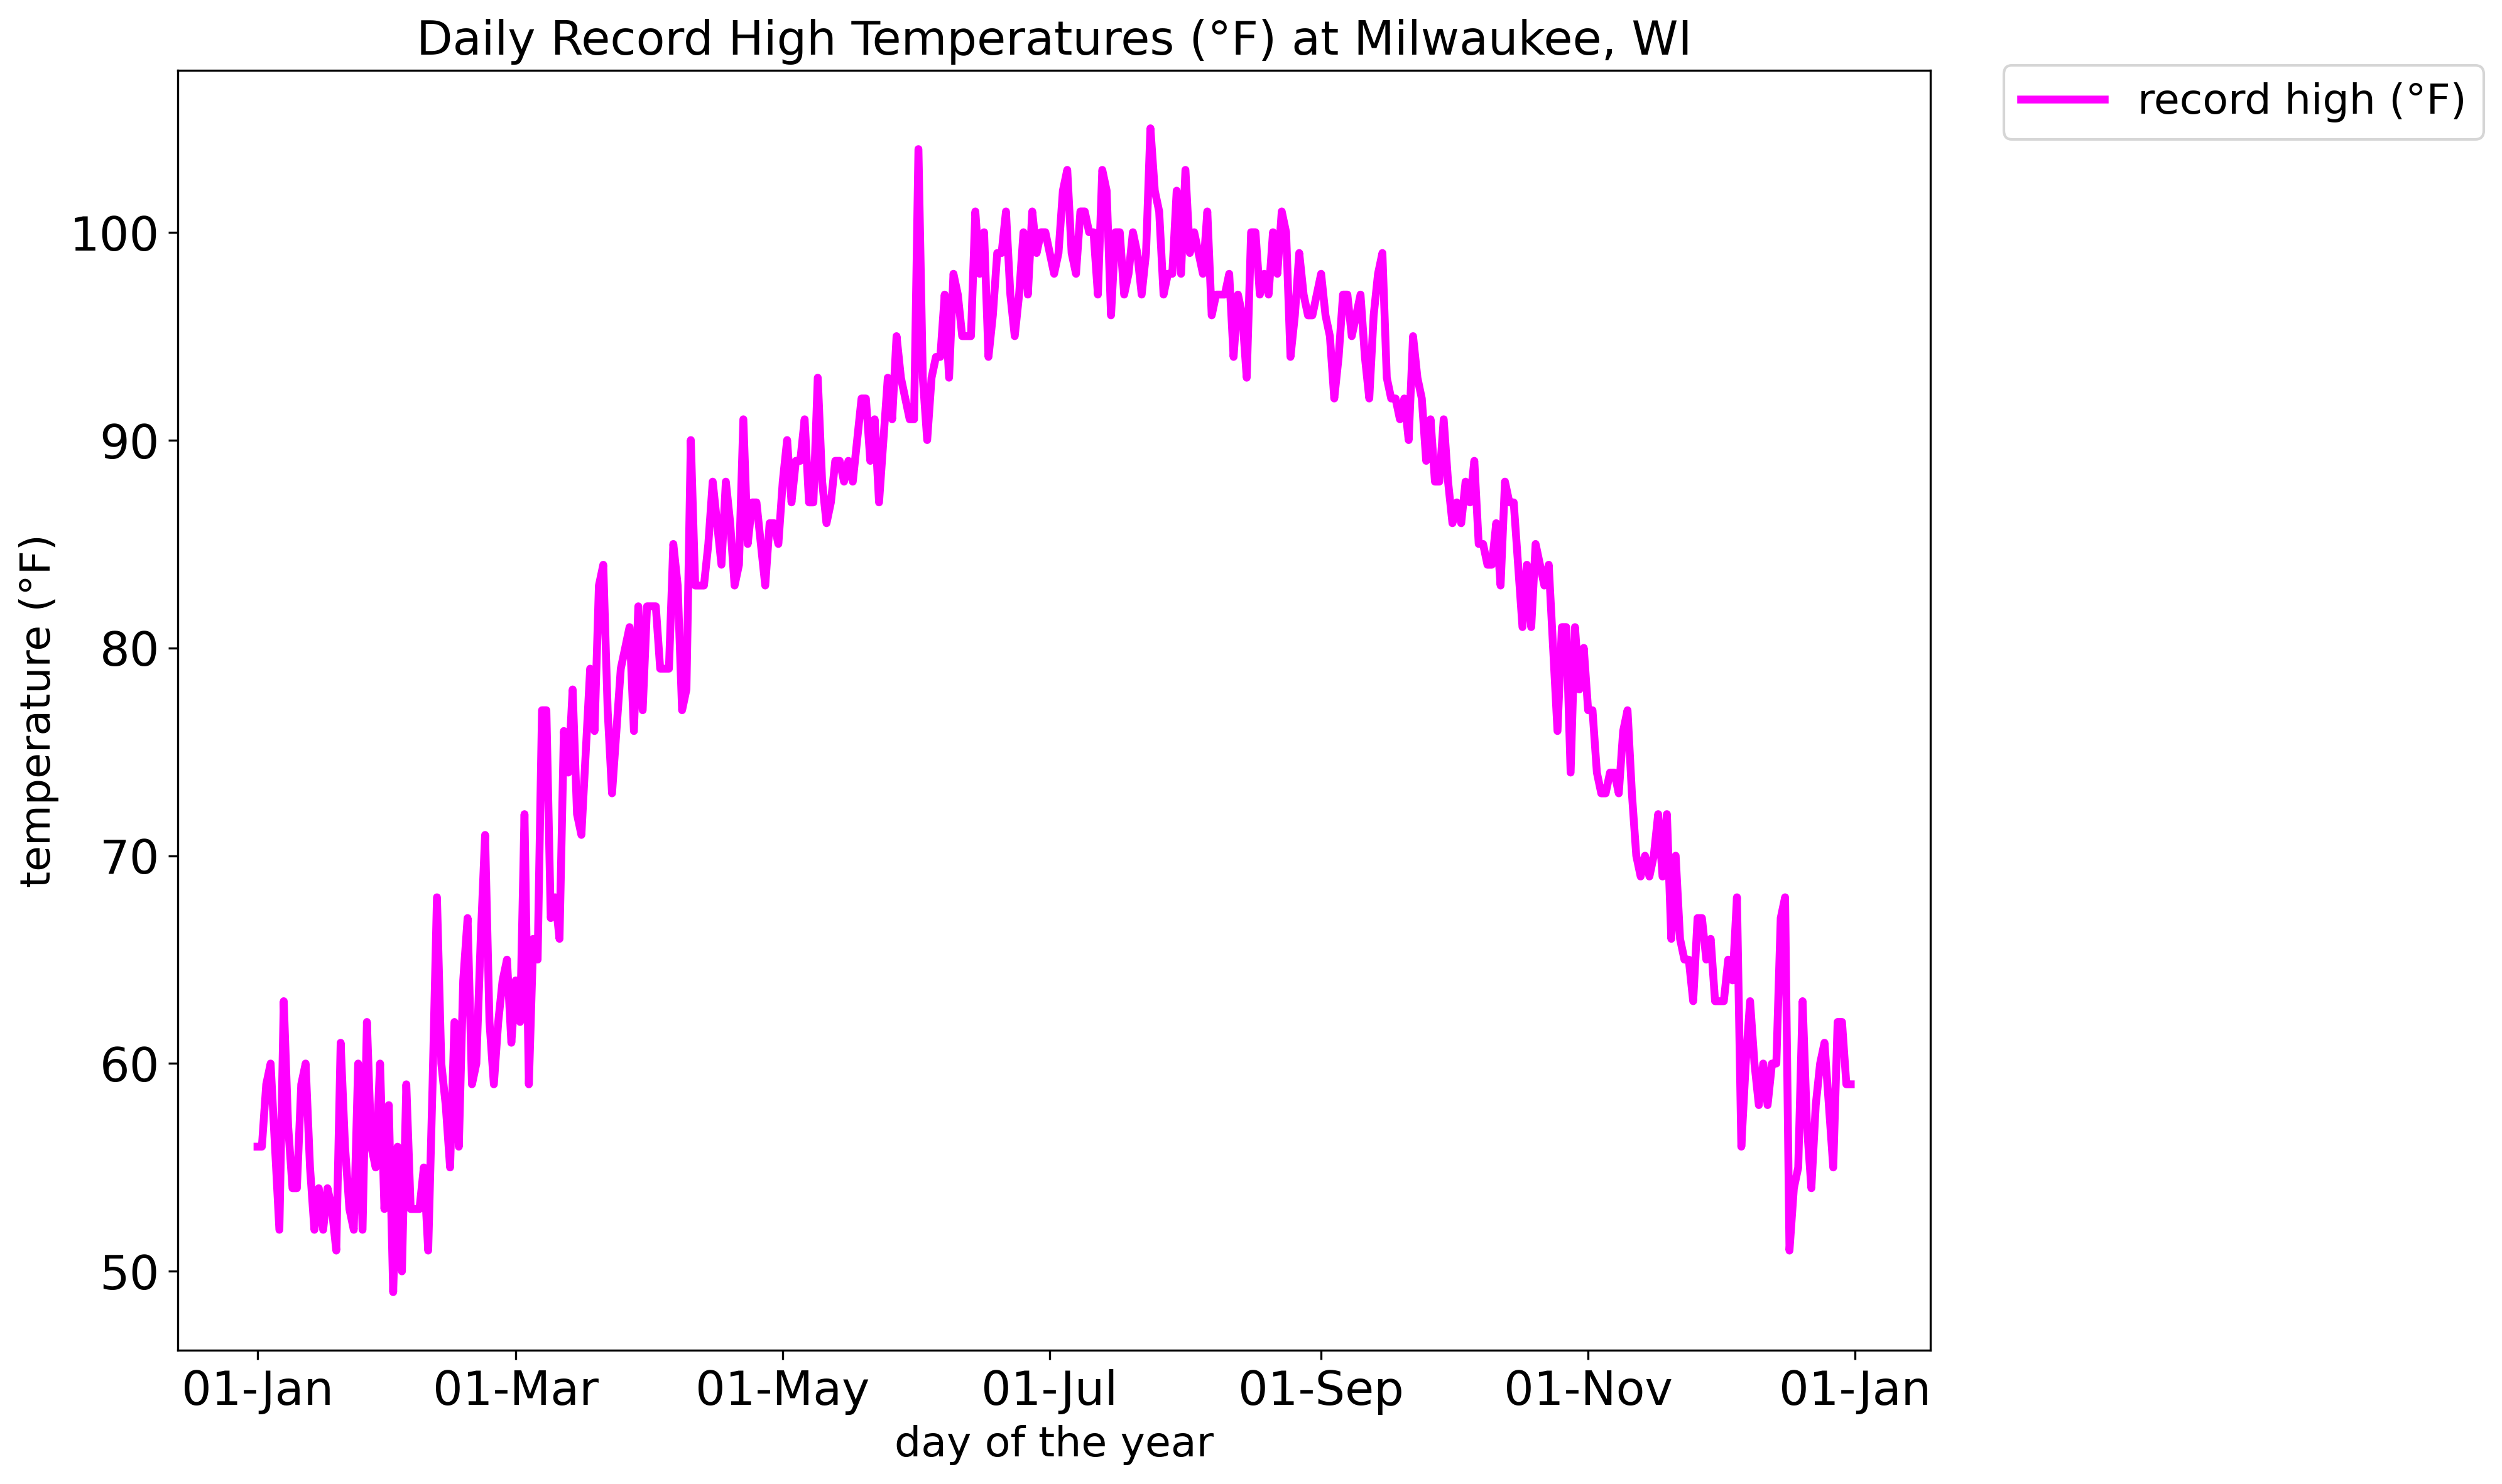

In [9]:
fig1 = plt.figure(figsize=(12,9), dpi=300)
ax = plt.axes()
ax.plot(data['day_of_year'], data['record_high_F'], linestyle='solid', color='magenta', linewidth=3, label='record high (°F)')
ax.tick_params(axis='both', labelsize=18)
ax.set_xlabel('day of the year', fontsize=16)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d-%b"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%d-%b"))
ax.set_ylabel('temperature (°F)', fontsize=16)
ax.set_title('Daily Record High Temperatures (°F) at Milwaukee, WI', fontsize=18)
legend = plt.legend(fontsize=16, bbox_to_anchor=(1.03, 1.02), loc='upper left')
plt.show()

We can also plot the record high and record low on the same figure. While we're doing so, we can also add a horizontal line at 32°F to help us identify records that are above or below the freezing mark.

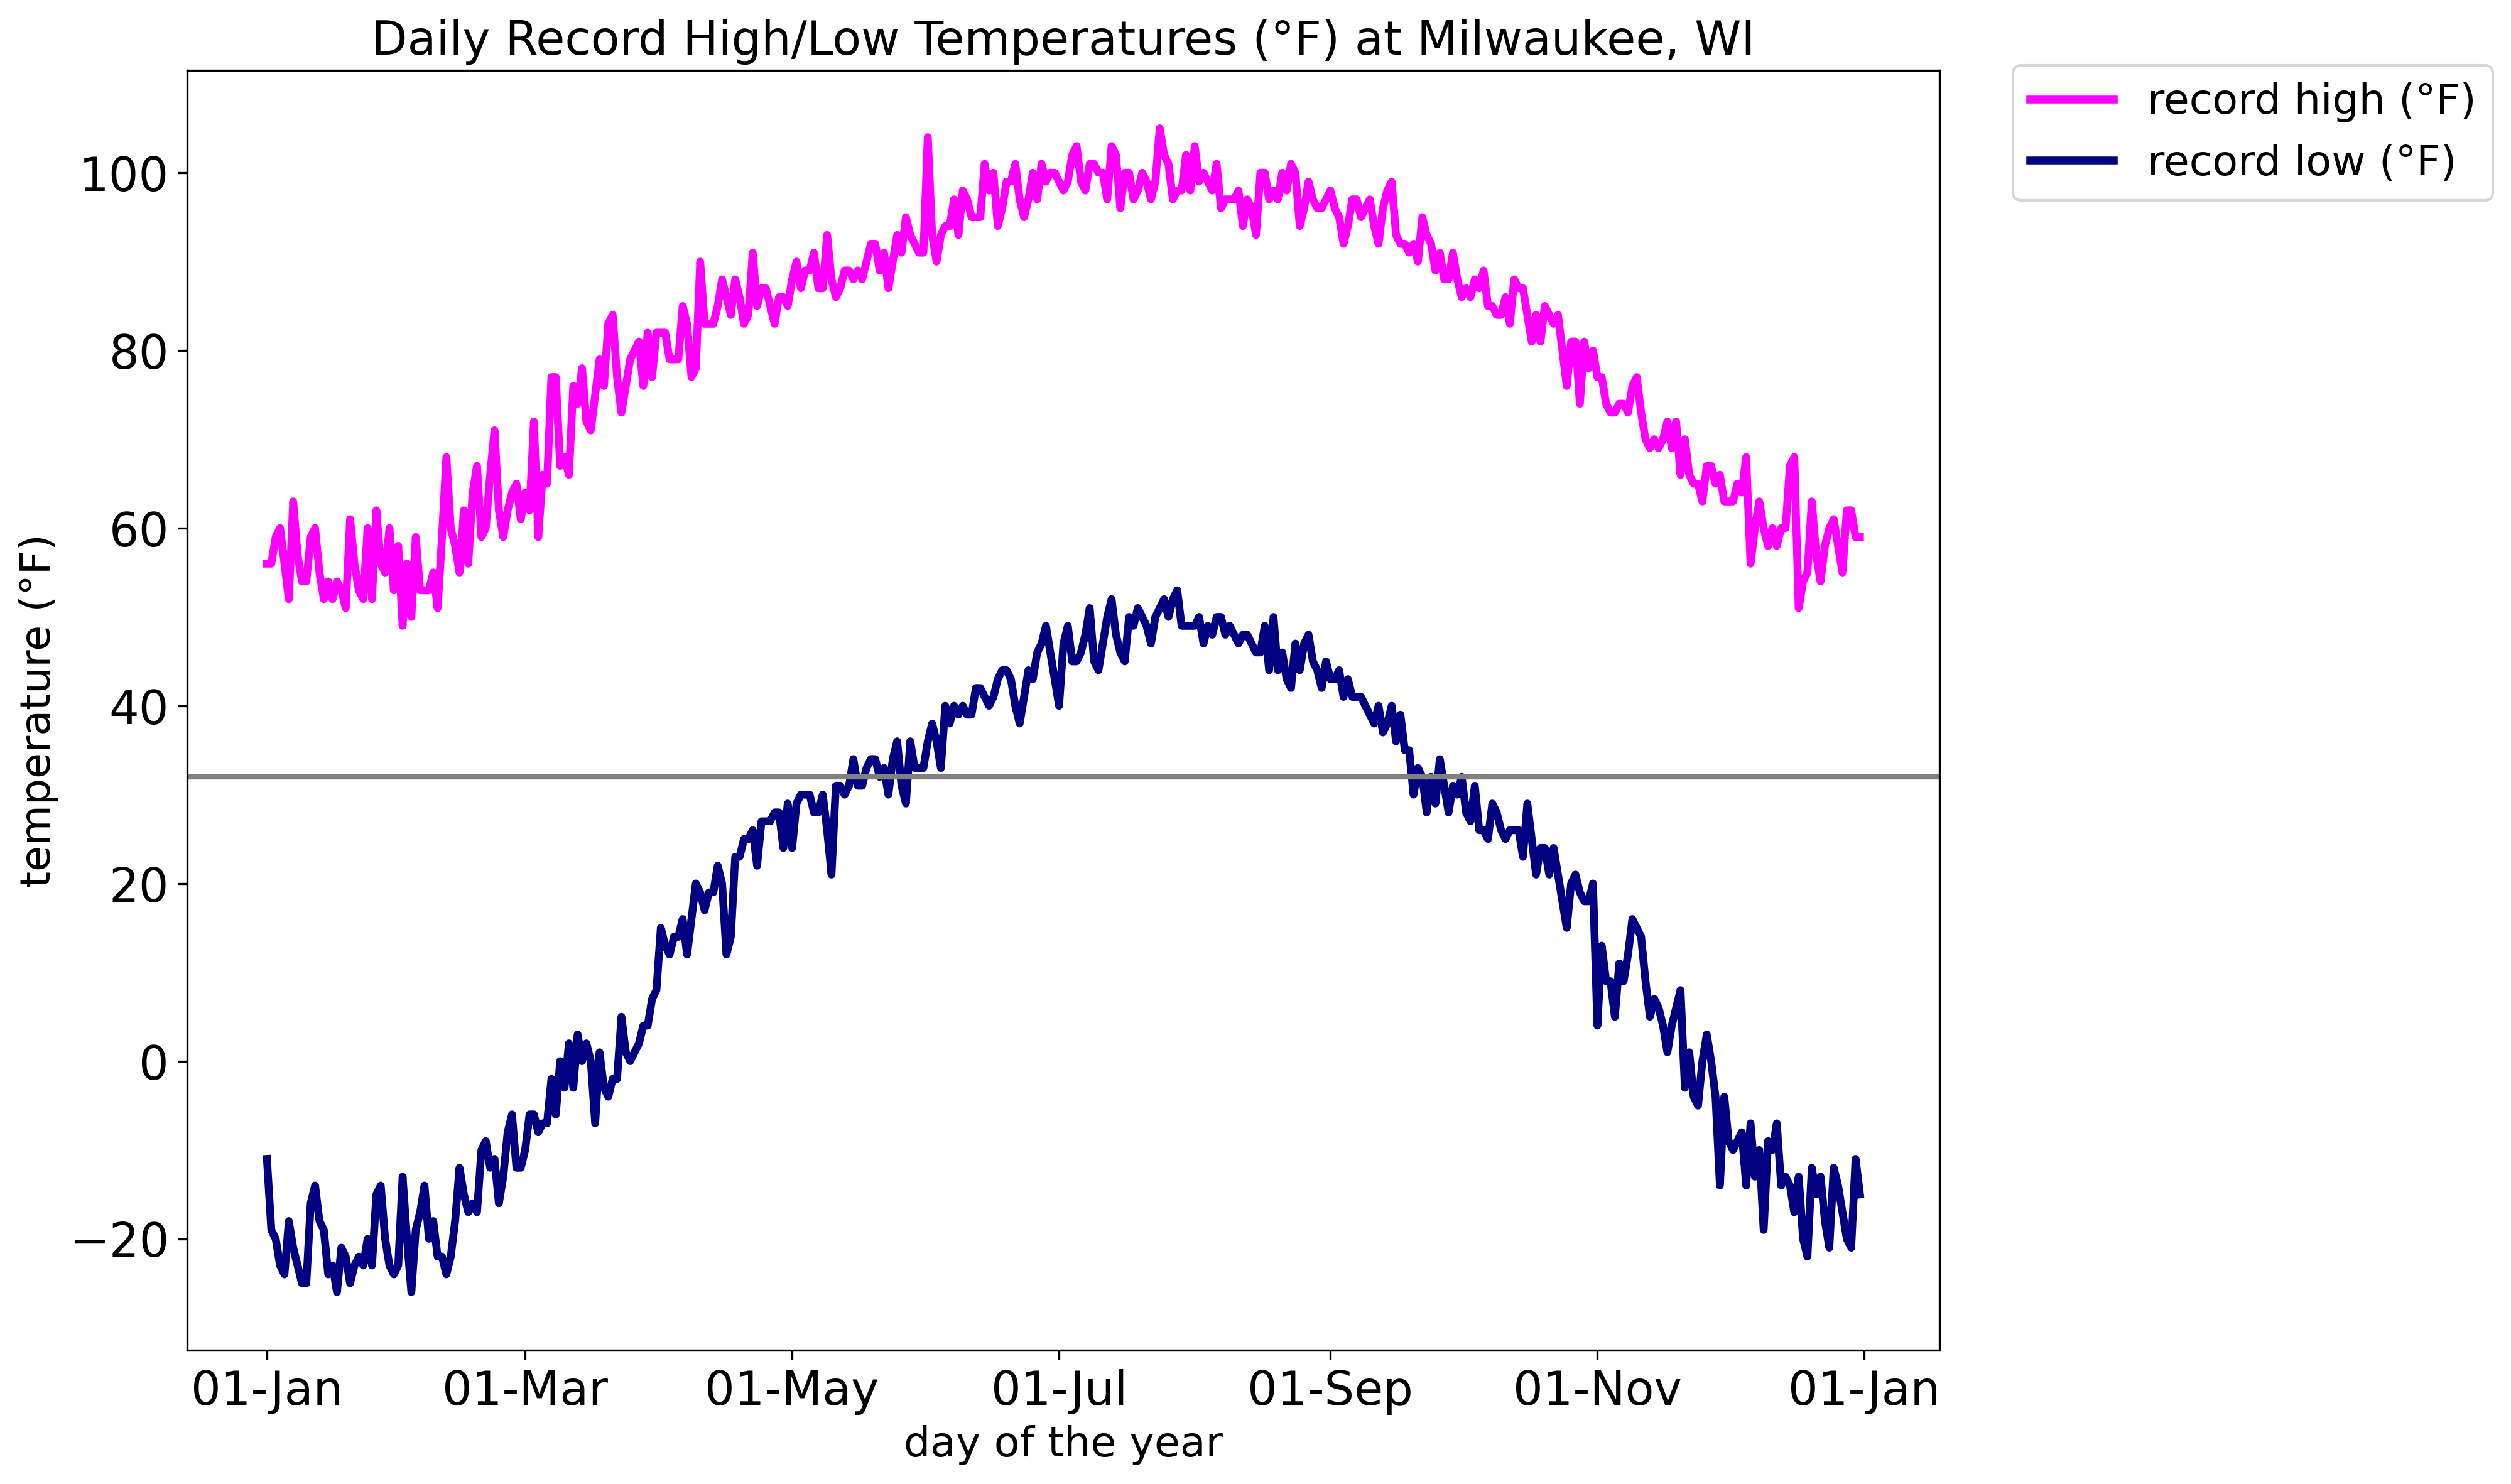

In [10]:
fig2 = plt.figure(figsize=(12,9), dpi=300)
ax = plt.axes()
ax.plot(data['day_of_year'], data['record_high_F'], linestyle='solid', color='magenta', linewidth=3, label='record high (°F)')
ax.plot(data['day_of_year'], data['record_low_F'], linestyle='solid', color='navy', linewidth=3, label='record low (°F)')
ax.axhline(32, color="grey", linestyle="solid", linewidth=2)
ax.tick_params(axis='both', labelsize=18)
ax.set_xlabel('day of the year', fontsize=16)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d-%b"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%d-%b"))
ax.set_ylabel('temperature (°F)', fontsize=16)
ax.set_title('Daily Record High/Low Temperatures (°F) at Milwaukee, WI', fontsize=18)
legend = plt.legend(fontsize=16, bbox_to_anchor=(1.03, 1.02), loc='upper left')
plt.show()

Perhaps we also want to add horizontal lines for the mean record high and low, as well as markers for the highest/lowest record high and record low temperatures. We previously computed the former, whereas we need to compute the latter. We can do so with pandas' max/min and idxmax/idxmin functions. The former compute the max/min values, whereas the latter return the indices of the max/min values. We then use these indices to get the day_of_year values corresponding to the returned indices (which are the row numbers) for plotting purposes.

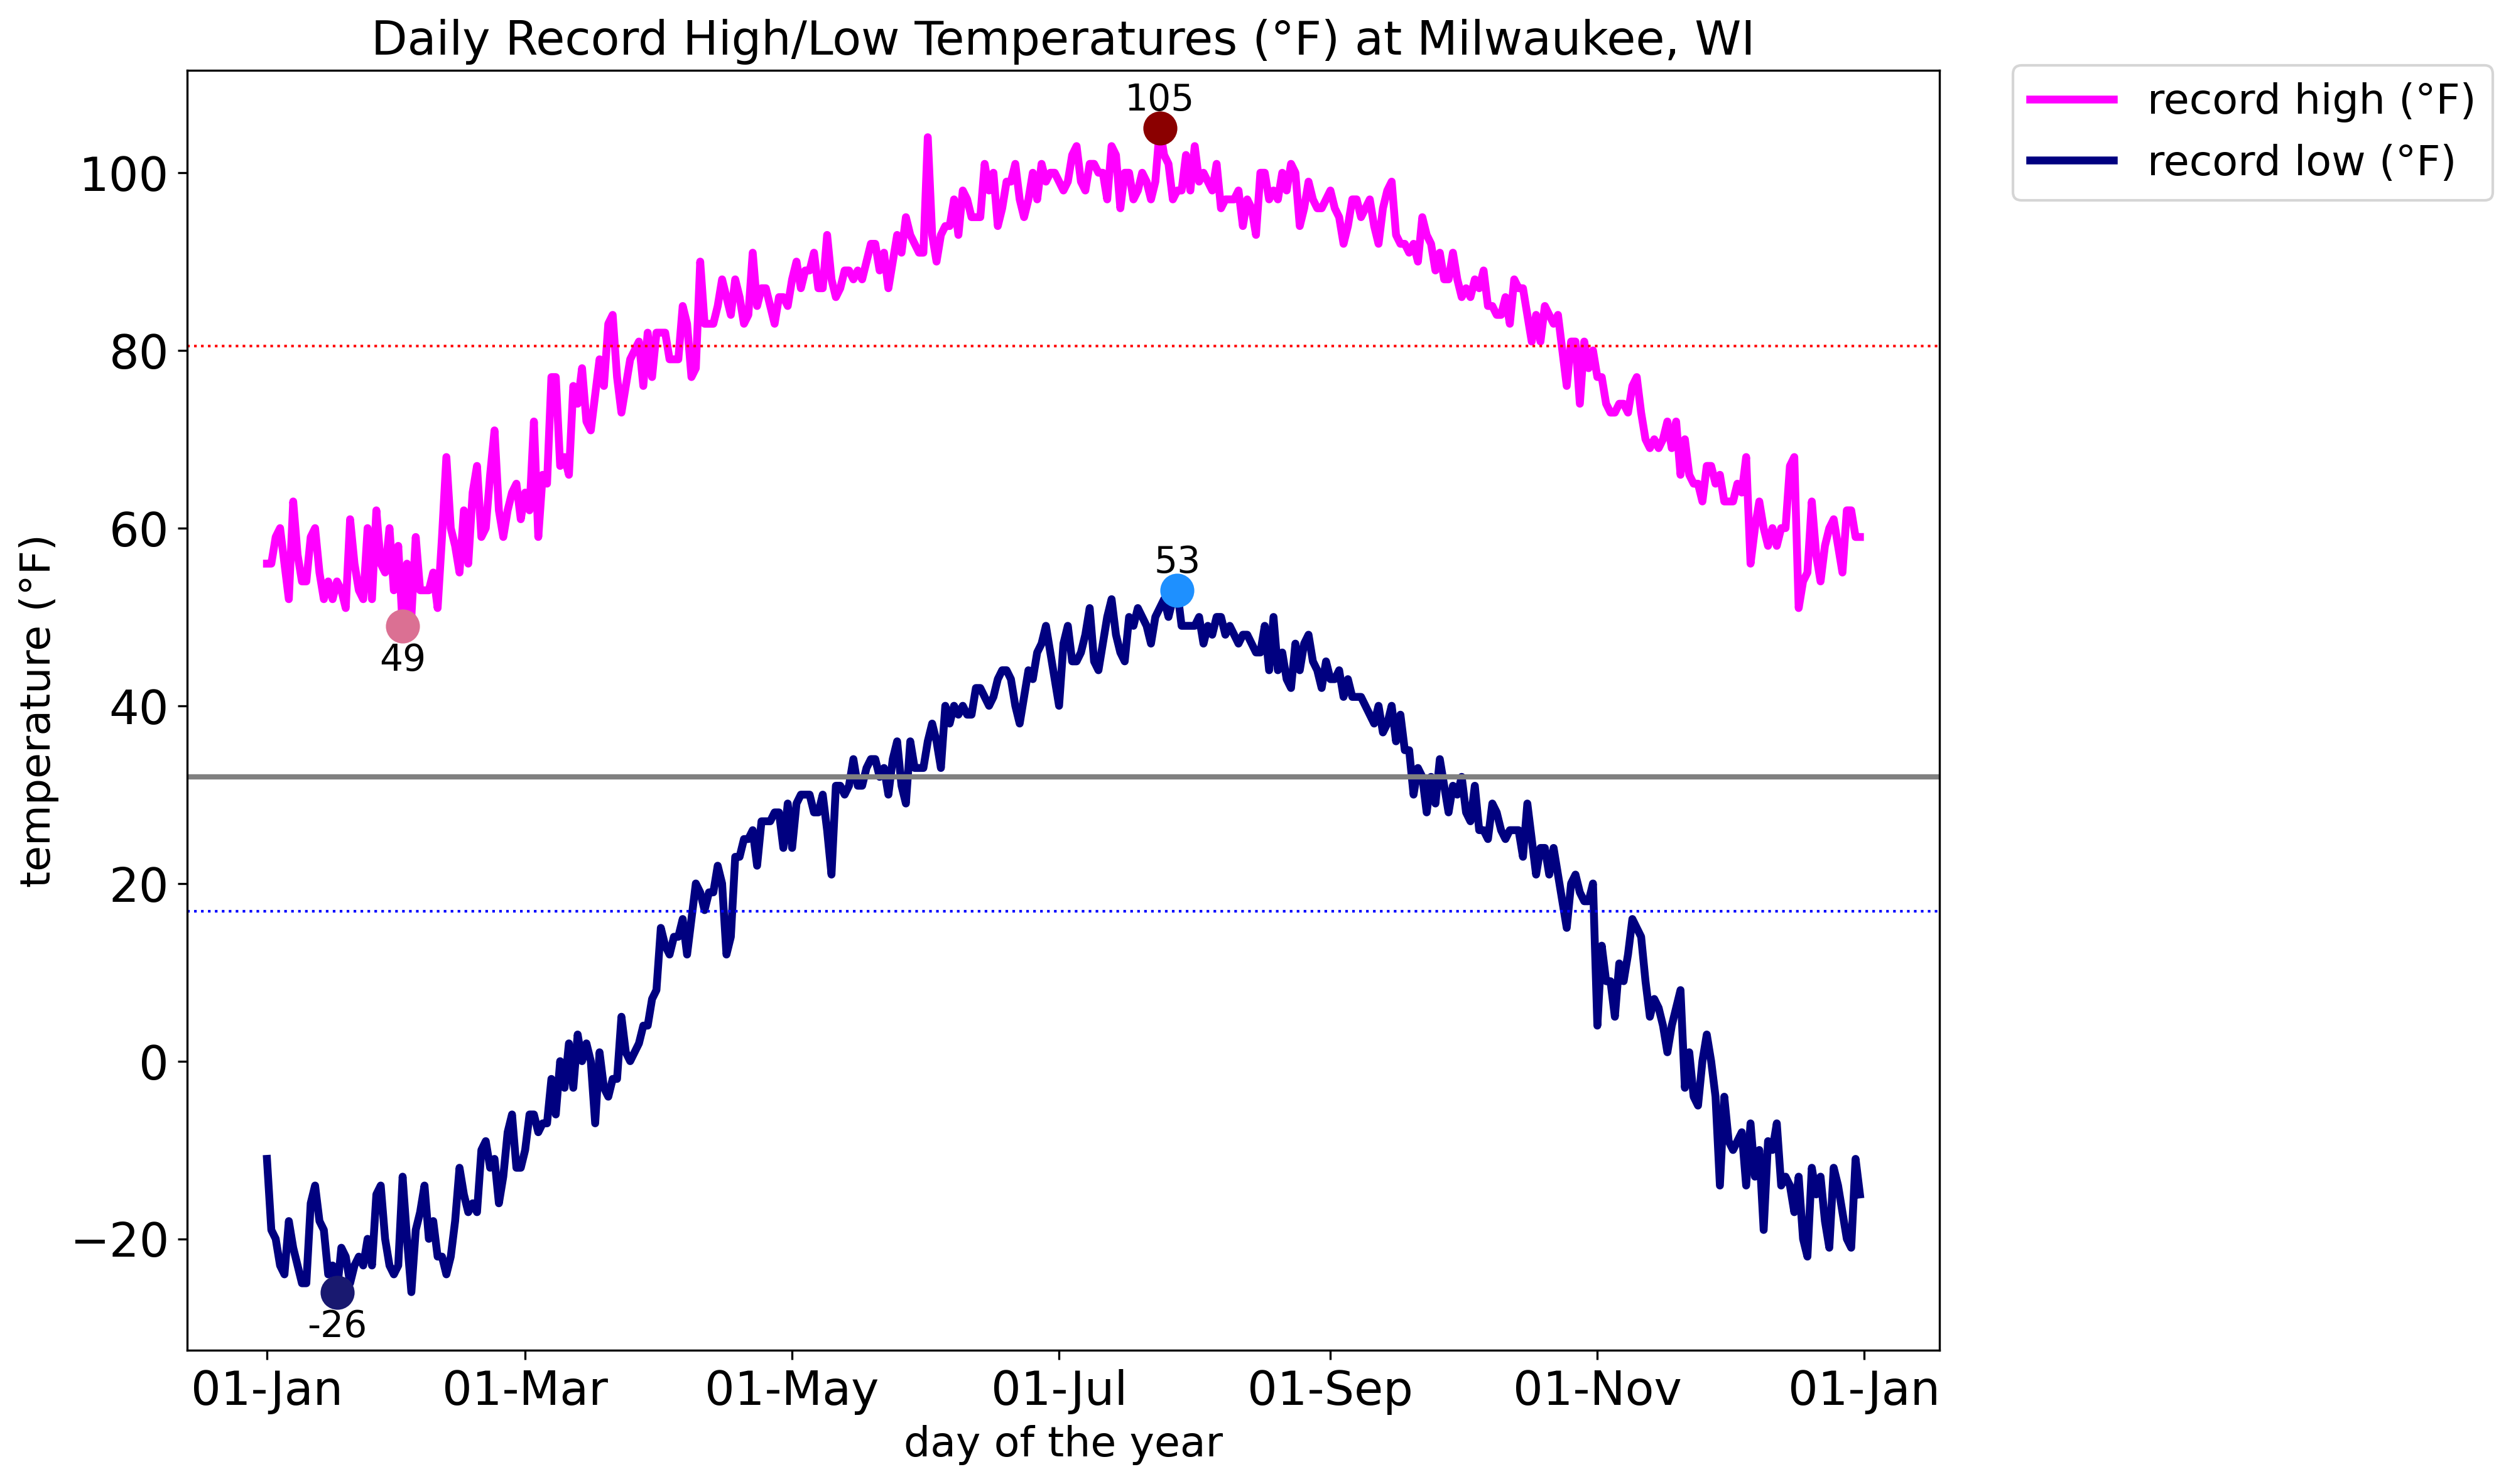

In [11]:
# Find the max/min values and their indices.
high_max = data['record_high_F'].max(axis=0)
high_max_idx = data['day_of_year'][data['record_high_F'].idxmax(axis=0)]
high_min = data['record_high_F'].min(axis=0)
high_min_idx = data['day_of_year'][data['record_high_F'].idxmin(axis=0)]
low_max = data['record_low_F'].max(axis=0)
low_max_idx = data['day_of_year'][data['record_low_F'].idxmax(axis=0)]
low_min = data['record_low_F'].min(axis=0)
low_min_idx = data['day_of_year'][data['record_low_F'].idxmin(axis=0)]

# Recreate the last plot including markers for these values.
# Note the text offset above/below each marker - these were
# specified through trial and error given these data's ranges.
fig3 = plt.figure(figsize=(12,9), dpi=300)
ax = plt.axes()
ax.plot(data['day_of_year'], data['record_high_F'], linestyle='solid', color='magenta', linewidth=3, label='record high (°F)')
ax.plot(high_max_idx, high_max, color='darkred', marker='o', markersize=12)
ax.text(high_max_idx, high_max+2, str(high_max), size=14, horizontalalignment='center')
ax.plot(high_min_idx, high_min, color='palevioletred', marker='o', markersize=12)
ax.text(high_min_idx, high_min-5, str(high_min), size=14, horizontalalignment='center')

ax.plot(data['day_of_year'], data['record_low_F'], linestyle='solid', color='navy', linewidth=3, label='record low (°F)')
ax.plot(low_max_idx, low_max, color='dodgerblue', marker='o', markersize=12)
ax.text(low_max_idx, low_max+2, str(low_max), size=14, horizontalalignment='center')
ax.plot(low_min_idx, low_min, color='midnightblue', marker='o', markersize=12)
ax.text(low_min_idx, low_min-5, str(low_min), size=14, horizontalalignment='center')

ax.axhline(32, color="grey", linestyle="solid", linewidth=2)
ax.axhline(high_mean, color="red", linestyle="dotted", linewidth=1)
ax.axhline(low_mean, color="blue", linestyle="dotted", linewidth=1)

ax.tick_params(axis='both', labelsize=18)
ax.set_xlabel('day of the year', fontsize=16)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d-%b"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%d-%b"))
ax.set_ylabel('temperature (°F)', fontsize=16)
ax.set_title('Daily Record High/Low Temperatures (°F) at Milwaukee, WI', fontsize=18)
legend = plt.legend(fontsize=16, bbox_to_anchor=(1.03, 1.02), loc='upper left')
plt.show()

Finally, let's add the daily average high and low temperatures to this plot as well.

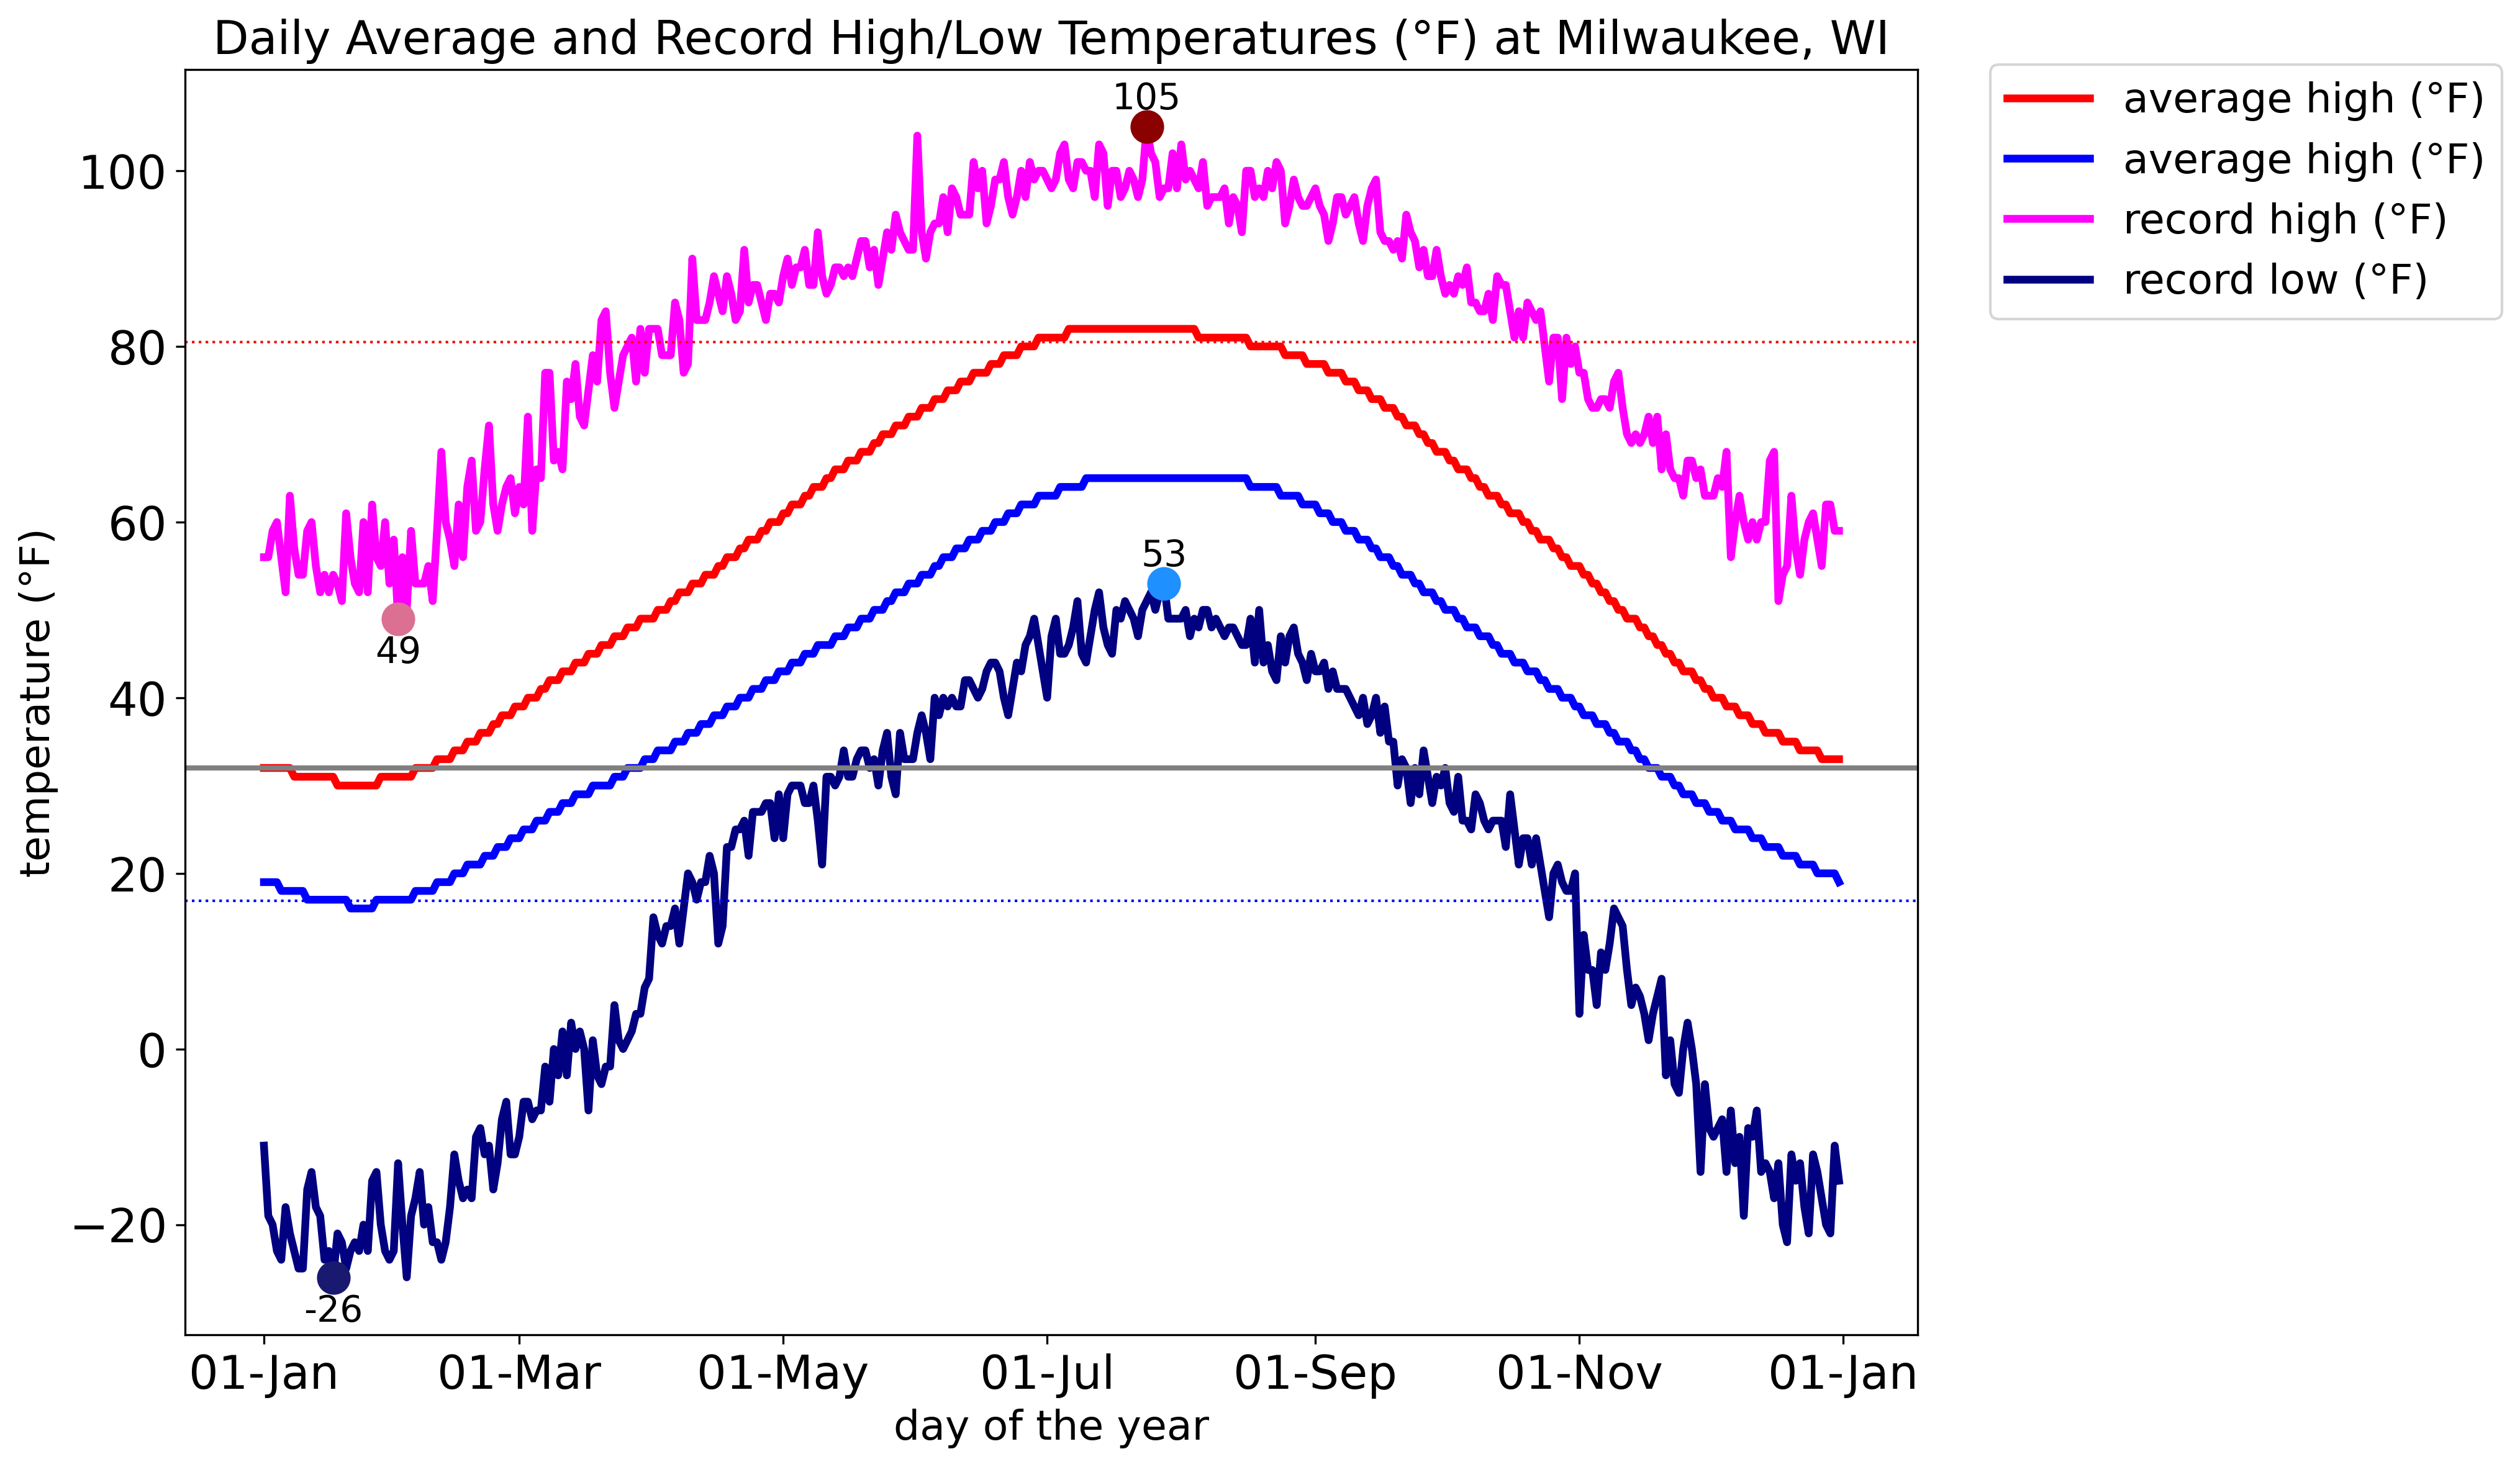

In [12]:
# Recreate the last plot including markers for these values.
# Note the text offset above/below each marker - these were
# specified through trial and error given these data's ranges.
fig4 = plt.figure(figsize=(12,9), dpi=300)
ax = plt.axes()

# averages
ax.plot(data['day_of_year'], data['average_high_F'], linestyle='solid', color='red', linewidth=3, label='average high (°F)')
ax.plot(data['day_of_year'], data['average_low_F'], linestyle='solid', color='blue', linewidth=3, label='average high (°F)')

# record highs
ax.plot(data['day_of_year'], data['record_high_F'], linestyle='solid', color='magenta', linewidth=3, label='record high (°F)')
ax.plot(high_max_idx, high_max, color='darkred', marker='o', markersize=12)
ax.text(high_max_idx, high_max+2, str(high_max), size=14, horizontalalignment='center')
ax.plot(high_min_idx, high_min, color='palevioletred', marker='o', markersize=12)
ax.text(high_min_idx, high_min-5, str(high_min), size=14, horizontalalignment='center')

# record lows
ax.plot(data['day_of_year'], data['record_low_F'], linestyle='solid', color='navy', linewidth=3, label='record low (°F)')
ax.plot(low_max_idx, low_max, color='dodgerblue', marker='o', markersize=12)
ax.text(low_max_idx, low_max+2, str(low_max), size=14, horizontalalignment='center')
ax.plot(low_min_idx, low_min, color='midnightblue', marker='o', markersize=12)
ax.text(low_min_idx, low_min-5, str(low_min), size=14, horizontalalignment='center')

# horizontal line at 32°F
ax.axhline(32, color="grey", linestyle="solid", linewidth=2)
ax.axhline(high_mean, color="red", linestyle="dotted", linewidth=1)
ax.axhline(low_mean, color="blue", linestyle="dotted", linewidth=1)

# plot parameters
ax.tick_params(axis='both', labelsize=18)
ax.set_xlabel('day of the year', fontsize=16)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d-%b"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%d-%b"))
ax.set_ylabel('temperature (°F)', fontsize=16)
ax.set_title('Daily Average and Record High/Low Temperatures (°F) at Milwaukee, WI', fontsize=18)
legend = plt.legend(fontsize=16, bbox_to_anchor=(1.03, 1.02), loc='upper left')
plt.show()